# 데이터 전처리 실습

- 타이타닉 생존자 예측 문제 데이터의 전처리

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2010.36.15.png?raw=1" width=400 align='left'>

# 데이터
- 타이타닉 탑승자 개인별 데이터를 보고 생존 여부를 예측하는 예제 데이터

- Survival - 생존여부(타겟변수 y): 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

## import

In [5]:
## 환경설정과 데이터 다운로드하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# 맥에서 레티나 디스플레이 사용 설정
%config InlineBackend.figure_format = 'retina'

# 그림 크기와 폰트 설정
matplotlib.rcParams['figure.figsize'] = (6,4)
plt.rc('font', size=13)

data = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")
print(data.shape) # 데이터의 수 확인
data[:3]

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
data[:3].T # transpose 행과 열을 바꿔 보기 위해서

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
Sex,male,female,female
Age,22.0,38.0,26.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,7.25,71.2833,7.925



## 데이터 전처리 종류

- 데이터 클리닝 - 결측치 처리, 틀린값 처리
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등
- 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링

## 데이터 기본 정보
- info를 사용
- 컬럼 이름, 컬럼수(특성 수), 샘플수를 파악한다
- 카테고리형 타입(object)과 숫자형 타입(int, float)을 파악한다
 - 숫자 타입도 연속적인 값을 갖는 아나로그형과 카테고리형이 있다

# 결측치 처리

- 결측치를 처리하는 방법은 크게 세 가지가 있다
 - 결측치가 포함된 샘플(행)을 버린다 (샘플 삭제)
 - 결측치를 적절한 값으로 대체한다
 - 결측치 처리를 다음 분석 단계로 넘긴다. 즉, 결측치를 그대로 둔다
 
- 특정 컬럼에 결측치가 너무 많은 경우 컬럼 자체를 사용하지 않는 방법도 있다 (컬럼 삭제)


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-06%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.01.24.png?raw=1" width=320 align='left'>

In [7]:
## 컬럼별 결측치 수 확인

# 사본 사용
df = data.copy()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 컬럼 미사용
- Cabin은 객실명으로, 의미있는 정보가 아니고, 결측치가 많고(687개), 종류가 다양하므로(146종류) 컬럼 자체를 사용하지 않기로 한다

## 결측치 대체

- Age(나이)는 결측치가 많으나, 의미 있는 정보이므로 삭제하지 않고 다른 값으로 대체한다 (평균치 사용)

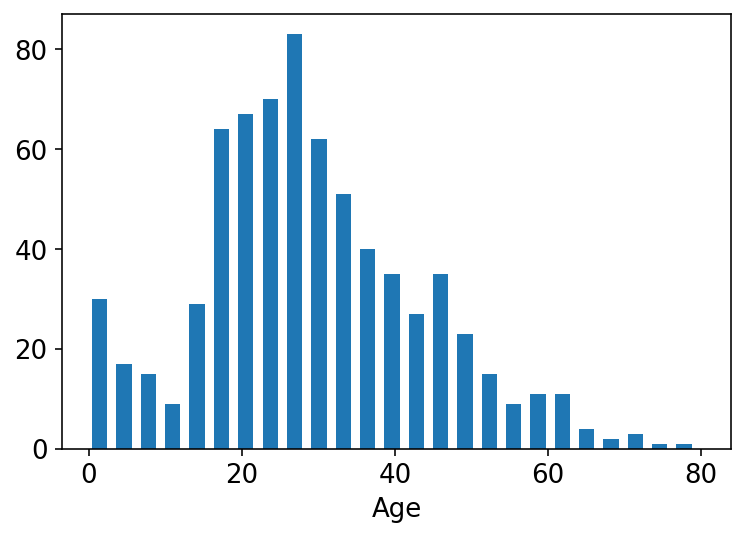

In [8]:
## Age (나이) 분포 보기

plt.hist(df.Age, bins=25, width=2)
plt.xlabel('Age')
plt.show()

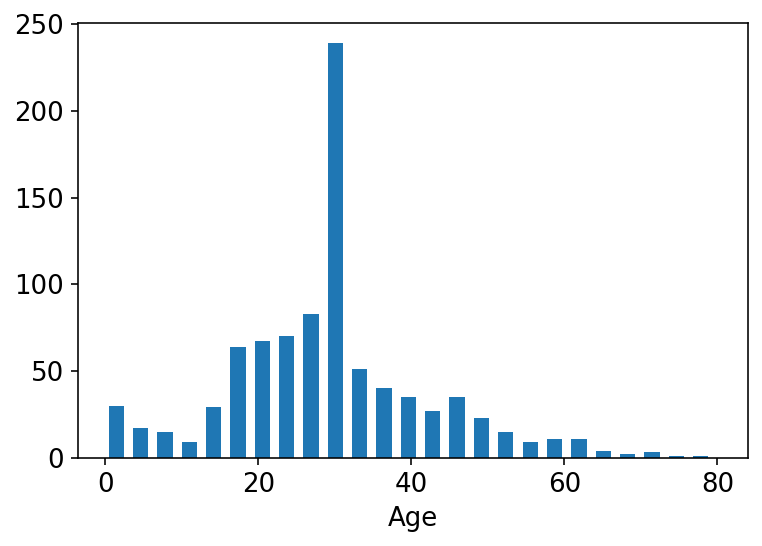

In [11]:
## 결측치를 평균 나이로 대체 (대체한 것을 즉시 반영했다)

# df.Age.fillna(df.Age.mean(), inplace=True) # 위 아래 둘 다 가능
df['Age'].fillna(df.Age.mean(), inplace=True)
plt.hist(df.Age, bins=25, width=2)
plt.xlabel('Age')
plt.show()

## 객실명

In [12]:
## Cabin(객실명) 보기 : nunique()

print("Cabin 종류:", df.Cabin.nunique())
df.Cabin.value_counts()[:5]

Cabin 종류: 147


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: Cabin, dtype: int64

## 결측치 샘플 삭제
- 항구 데이터(Embarked)는 결측치가 2개 뿐이고 다른 값으로 대체하기가 어려우므로 샘플을 삭제한다

In [13]:
## Embarked (항구명) 결측치가 있는 두 샘플은 삭제한다

print(df.shape)
df = df[~df["Embarked"].isnull()] # df[~] 표현은 true인 애들을 false로 바꾸고 true인 것만 남김 
print(df.shape)

(891, 12)
(889, 12)


In [14]:
## Ticket(티켓번호) 보기

print("Ticket 종류:", df.Ticket.nunique())
df.Ticket.value_counts()[:5]

Ticket 종류: 680


347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
Name: Ticket, dtype: int64

In [16]:
df.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived'],
      dtype='object')

In [17]:
## 사용하지 않을 컬럼 4개를 삭제한 데이터프레임을 만들고 백업한다 : difference() 

df = df[df.columns.difference(['PassengerId','Name','Ticket','Cabin'])]
df_clean = df.copy()
df[:5]

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0
1,38.0,C,71.2833,0,1,female,1,1
2,26.0,S,7.9250,0,3,female,0,1
3,35.0,S,53.1000,0,1,female,1,1
4,35.0,S,8.0500,0,3,male,0,0


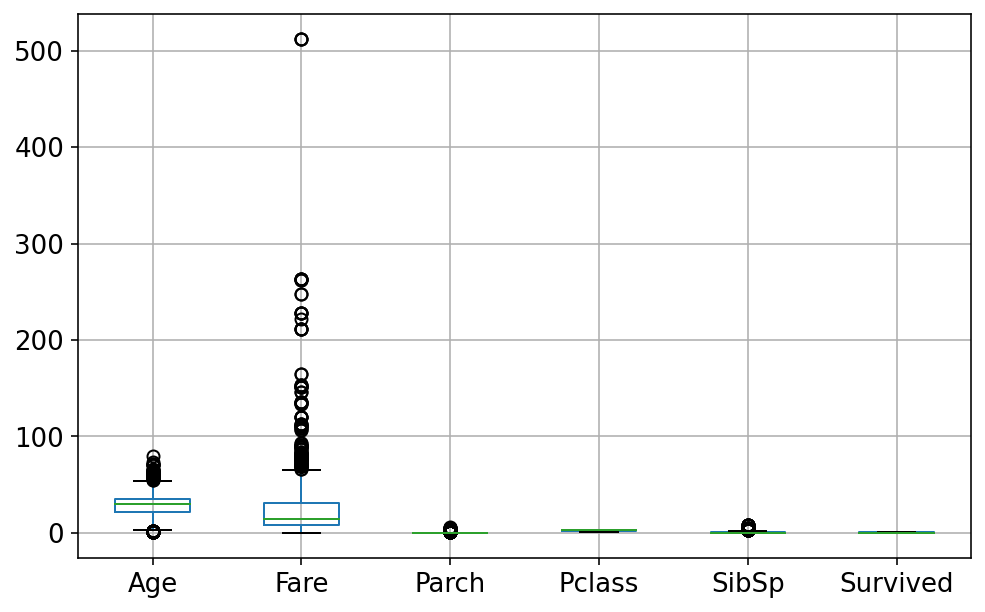

In [18]:
## 박스 플롯으로 데이터의 전체적인 값의 범위를 파악할 수 있다

plt.figure(figsize=(8,5))
df.boxplot()

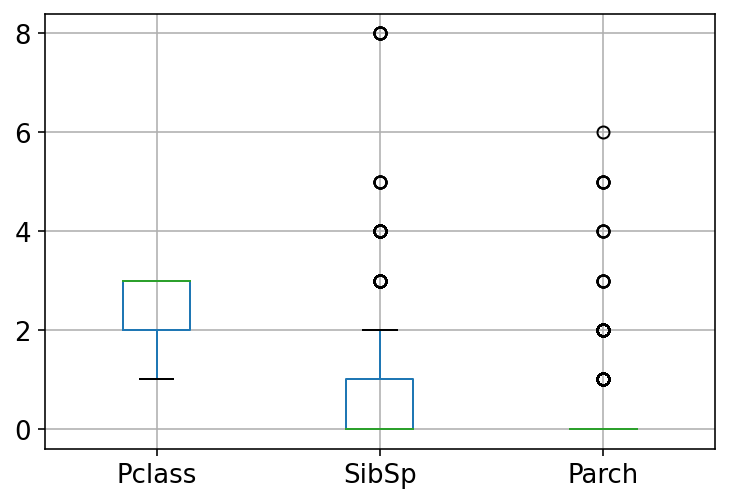

In [19]:
## 'Pclass','SibSp','Parch' 의 범위 보기

plt.figure(figsize=(6,4))
df[['Pclass','SibSp','Parch']].boxplot()

In [20]:
## 데이터프레임의 기본 정보 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Embarked  889 non-null    object 
 2   Fare      889 non-null    float64
 3   Parch     889 non-null    int64  
 4   Pclass    889 non-null    int64  
 5   Sex       889 non-null    object 
 6   SibSp     889 non-null    int64  
 7   Survived  889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


# 데이터 변환
- 카테고리 변수와 아나로그 변수로 나누어 처리한다
- 카테고리 변수 : Embarked, Pclass, Sex
- 카테고리 변수는 일반적으로 원핫 인코딩으로 표현한다
- 아나로그 변수는 로그변환, 역수변환 등을 하거나 카테고리 변수로 변환하기도 한다

## 카테고리 변수
### 선실 등급
- 숫자로 표현되어 있으나 카테고리를 나타낸다 (3가지 등급)
- 원핫(one-hot) 인코딩으로 변환한다
- get_dummies() 사용

In [21]:
# df = df_clean.copy()

In [22]:
# 선실 등급은 3가지 등급을 나타내는 카테고리 변수임
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

### 성별
- 성별도 카테고리 변수이며 원핫 인코딩으로 변환한다

### 항구명
- 세가지 항구명도 카테고리 변수이며 원핫 인코딩으로 변환한다

In [23]:
## 항구명은 세가지 항구를 구분하는 범주형 변수이다

df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
## 선실등급, 성별, 항구명을 원핫 인코딩한다 : get_dummies()

df = pd.get_dummies(df, columns=['Pclass','Sex','Embarked'])
df[:5].T

,0,1,2,3,4
Age,22.00,38.0000,26.000,35.0,35.00
Fare,7.25,71.2833,7.925,53.1,8.05
Parch,0.00,0.0000,0.000,0.0,0.00
SibSp,1.00,1.0000,0.000,1.0,0.00
Survived,0.00,1.0000,1.000,1.0,0.00
Pclass_1,0.00,1.0000,0.000,1.0,0.00
Pclass_2,0.00,0.0000,0.000,0.0,0.00
Pclass_3,1.00,0.0000,1.000,0.0,1.00
Sex_female,0.00,1.0000,1.000,1.0,0.00
Sex_male,1.00,0.0000,0.000,0.0,1.00


### 티켓명
- 680 종류나 되며 분석에 큰 의미가 없는 것으로 보인다. 분석에 사용하지 않는다

## 연속형 변수

### 요금

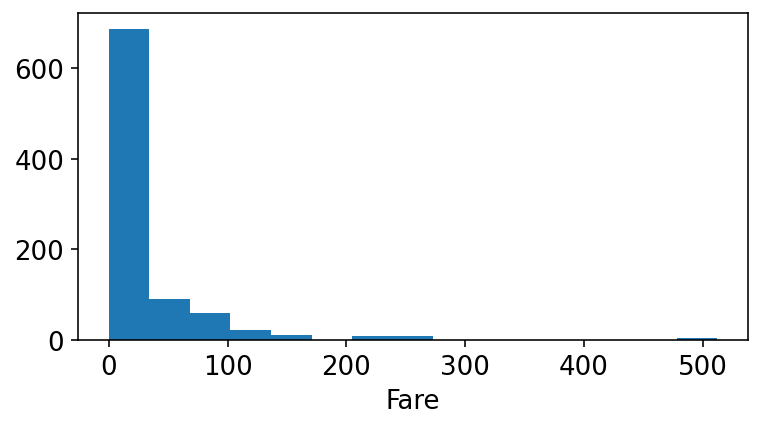

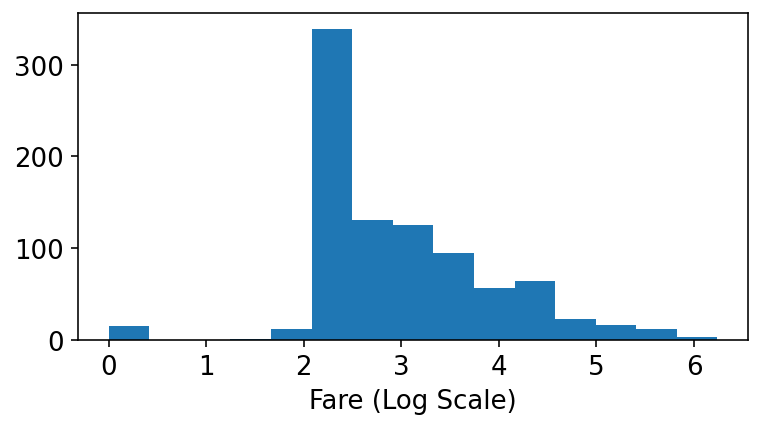

In [26]:
## 돈과 관련된 데이터는 로그를 취하면 정규 분포처럼 보인다

plt.figure(figsize=(6,3))
plt.hist(df.Fare, bins=15)
plt.xlabel('Fare')
plt.show()
plt.figure(figsize=(6,3))
plt.hist(np.log(df.Fare+1), bins=15)
plt.xlabel('Fare (Log Scale)') # Log 함수를 적용하면 정규분포형태를 가짐
plt.show()

In [27]:
## 요금(Fare)은 로그를 취한 값을 사용한다

df["Fare"] = np.log(df.Fare +1)
df[:5].T

,0,1,2,3,4
Age,22.000000,38.000000,26.000000,35.000000,35.000000
Fare,2.110213,4.280593,2.188856,3.990834,2.202765
Parch,0.000000,0.000000,0.000000,0.000000,0.000000
SibSp,1.000000,1.000000,0.000000,1.000000,0.000000
Survived,0.000000,1.000000,1.000000,1.000000,0.000000
Pclass_1,0.000000,1.000000,0.000000,1.000000,0.000000
Pclass_2,0.000000,0.000000,0.000000,0.000000,0.000000
Pclass_3,1.000000,0.000000,1.000000,0.000000,1.000000
Sex_female,0.000000,1.000000,1.000000,1.000000,0.000000
Sex_male,1.000000,0.000000,0.000000,0.000000,1.000000


### 기타 변수
- 형제, 동반자, 부모, 자녀 수 등은 다양하게 분포하며 분석에 그대로 사용할 수 있을 것이다
- 즉, 별도의 변환은 하지 않는다

# 스케일링
- 일반적으로 연속형, 아나로그 값은 스케일링을 하는 것이 안전하다
- 결정트리, 랜덤 포레스트 등 트리 계열의 모델에서는 스케일링을 하지 않아도 되지만 선형모델, 신경망 모델 등에서 스케일링을 해야 잘 동작한다
- 기본적으로는 표준 스케일링을 하며, 최대값과 최소값의 범위가 분명히 한정되어 있을 때는 min-max 스케일링도 사용한다

In [31]:
## 연속형 변수에 표준 스케일링을 적용한다

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:][['Age','Fare','SibSp','Parch']] = scaler.fit_transform(df[['Age','Fare','SibSp','Parch']])
df[:5].T

,0,1,2,3,4
Age,-0.590495,0.643971,-0.281878,0.412509,0.412509
Fare,-0.877591,1.366380,-0.796281,1.066796,-0.781901
Parch,0.000000,0.000000,0.000000,0.000000,0.000000
SibSp,1.000000,1.000000,0.000000,1.000000,0.000000
Survived,0.000000,1.000000,1.000000,1.000000,0.000000
Pclass_1,0.000000,1.000000,0.000000,1.000000,0.000000
Pclass_2,0.000000,0.000000,0.000000,0.000000,0.000000
Pclass_3,1.000000,0.000000,1.000000,0.000000,1.000000
Sex_female,0.000000,1.000000,1.000000,1.000000,0.000000
Sex_male,1.000000,0.000000,0.000000,0.000000,1.000000


In [32]:
## 데이터분석에 사용할 X와 y 얻기 : y = Survived

X = df[df.columns.difference(['Survived'])]
y = df.Survived
print('X 구조와 특성:',X.shape)
print(list(X.columns))
y.value_counts()

X 구조와 특성: (889, 12)
['Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp']


0    549
1    340
Name: Survived, dtype: int64

In [35]:
np.savetxt("titanic.csv", df, delimiter=",", fmt = '%.6f')